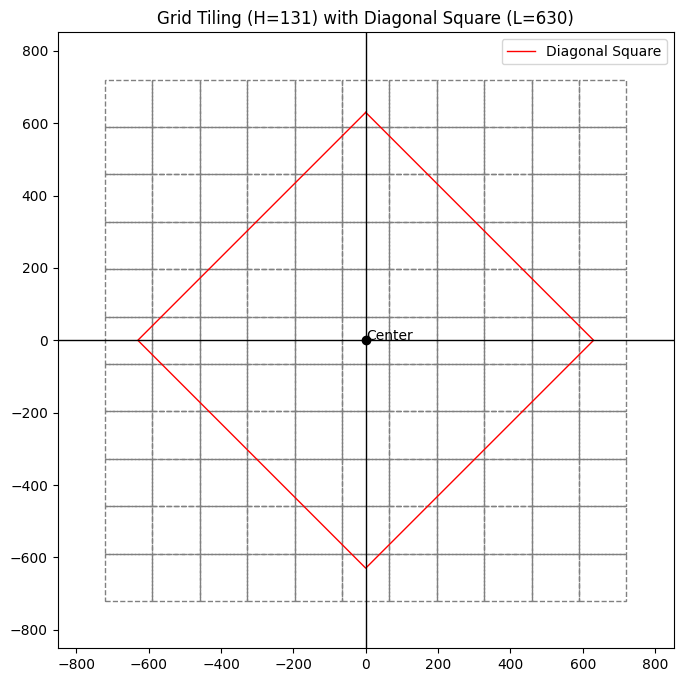

In [3]:
# Re-import necessary libraries after kernel reset
import matplotlib.pyplot as plt
import numpy as np


def draw_grid_with_diagonal(H, L):
    # Derived values
    half_H = H / 2
    extend = L
    total_extend = extend + H-((extend - half_H) % H)

    # Compute the boundary for the full visible area
    bounds = [-total_extend-H, total_extend+H]

    # Diagonal square vertices (centered at 0,0)
    diagonal_square = np.array([
        [0, L],
        [L, 0],
        [0, -L],
        [-L, 0],
        [0, L]
    ])

    fig, ax = plt.subplots(figsize=(8, 8))

    # Draw grid tiles: we tile from -total_extend to +total_extend with spacing H
    grid_offsets = np.arange(-total_extend, total_extend, H)

    for dx in grid_offsets:
        for dy in grid_offsets:
            # Draw the boundary of each duplicated grid square
            square = plt.Rectangle(
                # lower left corner vertex.
                (dx, dy), H, H, fill=False, edgecolor='gray', linestyle='--')
            ax.add_patch(square)

    # Draw the central diagonal square
    ax.plot(diagonal_square[:, 0], diagonal_square[:, 1],
            'r-', linewidth=1, label='Diagonal Square')

    # Draw center point
    ax.plot(0, 0, 'ko')
    ax.text(0.1, 0.1, "Center", fontsize=10)

    # Axis settings
    ax.set_aspect('equal')
    ax.set_xlim(bounds)
    ax.set_ylim(bounds)
    ax.axhline(0, color='black', linewidth=1)
    ax.axvline(0, color='black', linewidth=1)
    ax.set_title(f"Grid Tiling (H={H}) with Diagonal Square (L={L})")
    ax.legend()

    plt.grid(False)
    plt.show()


H = 131
L = 630
# Default call with adjustable parameters
draw_grid_with_diagonal(H, L)

In [ ]:
def printCalculationDetail(H, L):
    half_H = H / 2
    extend = L
    total_extend = extend + H-((extend - half_H) % H)
    square_triangle_edge_size = (int)((total_extend+half_H)/H)
    print('The edge length of the square triangle is',
          square_triangle_edge_size, sep=': ')
    print('In horizontal line and vertical line, there are',
          ((square_triangle_edge_size-3) * 4)+1, 'fully-filled squares')
    quadrant_fully_filled = sum(layer -
                                3 for layer in range(1, square_triangle_edge_size) if layer > 3)
    print('Along side the fully-filed squares in each quadrant:',
          quadrant_fully_filled)
    print('In total there are', quadrant_fully_filled*4 +
          square_triangle_edge_size, 'fully-filled squares')
    print('In each quadrant, there are', 2,
          'small triangles and trapezoids alongside the two axes')
    bigTriangle = sum(layer - 1 for layer in range(1,
                      square_triangle_edge_size) if layer > 1)
    print('In each quadrant, There are', bigTriangle,
          'big triangles and', bigTriangle+1, 'polygons')


printCalculationDetail(H, L)

The edge length of the square triangle is: 6
In horizontal line and vertical line, there are 13 fully-filled squares
Along side the fully-filed squares in each quadrant: 3
In total there are 18 fully-filled squares
In each quadrant, there are 2 small triangles and trapezoids alongside the two axes
In each quadrant, There are 10 big triangles and 11 polygons
